In [5]:
#Import Data Analysis Libraries
import os
import pandas as pd
#os.chdir("")
import numpy as np

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
pwd!

'C:\\Users\\acer\\Desktop'

In [6]:
os.chdir("C:\\Users\\acer\\Desktop\\New folder (2)")

In [40]:
train=pd.read_csv("C:\\Users\\acer\\Desktop\\New folder (2)\\train.csv")

In [43]:
test=pd.read_csv("C:\\Users\\acer\\Desktop\\New folder (2)\\test.csv")

In [41]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [44]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [39]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea

In [38]:
test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [18]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [22]:
#train=train.drop(['PoolQC','MiscFeature','Fence','MiscFeature'],axis=1)

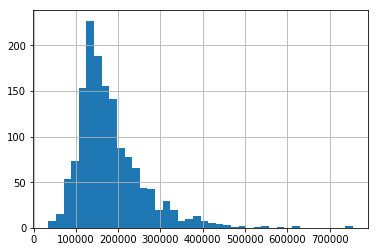

In [23]:
train['SalePrice'].hist(bins = 40)

In [24]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

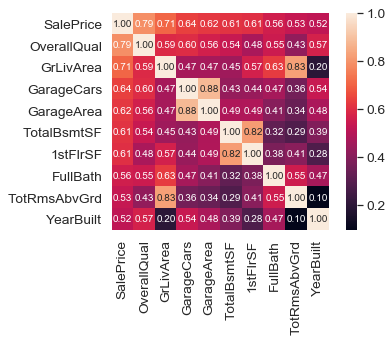

In [31]:
corrmat = train.corr()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
# training data ans testing data has different columns containing missing value.
#So combine variables in training data ans testing data for EDA and feature engineering

train_val=train.drop('SalePrice',axis=1)
test_val=test
val_total=pd.concat([train_val,test_val])

In [33]:
#missing in total data
miss=val_total.isnull().sum(axis=0).sort_values(ascending=False)
miss=miss[miss>0]
miss

PoolQC          2916
MiscFeature     2868
Alley           2721
Fence           2629
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

In [47]:
#for catergorical variables, we replece missing data with None
Miss_cat=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 
          'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in Miss_cat:
    val_total[col].fillna('None',inplace=True)
# for numerical variables, we replace missing value with 0
Miss_num=['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'] 
for col in Miss_num:
    val_total[col].fillna(0, inplace=True)

In [48]:
miss=val_total.isnull().sum(axis=0).sort_values(ascending=False)
miss=miss[miss>0]
miss

LotFrontage    486
MSZoning         4
Functional       2
Utilities        2
SaleType         1
Exterior1st      1
KitchenQual      1
Electrical       1
Exterior2nd      1
dtype: int64

In [49]:
#For the rest variables with missing values, we replace missing values with the most common values

rest_val=['MSZoning','Functional','Utilities','Exterior1st', 'SaleType','Electrical', 'Exterior2nd','KitchenQual']
for col in rest_val:
    val_total[col].fillna(val_total[col].mode()[0],inplace=True)

In [50]:
miss=val_total.isnull().sum(axis=0).sort_values(ascending=False)
miss=miss[miss>0]
miss

LotFrontage    486
dtype: int64

In [51]:
#For the LotFrontage,which is Linear feet of street connected to property, 
#We assme individual neighborhood type has similar LotFrontage.Therefore, we
#replace missing value in LotFrontage with median of that of neighborhood

val_total['LotFrontage']=val_total.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [52]:
#First convert MSSubClass, YearBuilt, YearRemodAdd to categorical values

for col in ['MSSubClass', 'YearBuilt', 'YearRemodAdd']:
    val_total[col]=val_total[col].astype(str)
new_train_data=pd.concat([val_total[:len(train)],train['SalePrice']],axis=1)



In [53]:
#Seperate categorical and numerical data

Cat=[]
Num=[]
for col in new_train_data.columns:
    if new_train_data.dtypes[col]=='object':
        Cat.append(col)
    else:
        Num.append(col)

In [54]:
Num.remove('Id')
Num.remove('SalePrice')

In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=preprocessing.MinMaxScaler()
min_max_val=min_max_scaler.fit_transform(val_total[Num])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [56]:
min_max_val.shape

(2919, 33)

In [57]:
dummy_cat = pd.get_dummies(val_total[Cat])
##convert dummy_cat to numpy array
dummy_cat=np.array(dummy_cat)
dummy_cat.shape


(2919, 461)

In [58]:
#combine min_max_val and dummy_cat as our features
total_feature=np.concatenate([min_max_val,dummy_cat],axis=1)

In [59]:
#seperate train and test
train_feature=total_feature[: len(train),:]
test_feature=total_feature[len(train):,:]
Y=train['SalePrice']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_feature,Y,test_size=0.2)

In [65]:
X_train.shape,X_test.shape,Y_train.shape

((1168, 494), (292, 494), (1168,))

Let's build some models


 LASSO (or kernel ridge regression),

 Random forests regression

In [110]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor(random_state=420)
parameters = {
    'n_estimators': [10, 100],
    'max_depth': [10, 100],
    'min_samples_split': [10, 100],
    'min_samples_leaf': [10, 100],
}
forest1 = GridSearchCV(forest1, parameters)
cv_rmse(forest1, X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

array([25974.41257385, 30127.57687936, 34065.62637394, 40376.31836309,
       27346.33491774, 36852.32412789, 32613.49351802, 23336.14695421,
       32697.8405064 , 29425.6037524 ])

 XGBoost

In [70]:
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
random_grid={'learning_rate':[0.001,0.01],
            'max_depth':[10,30],
            'n_estimators':[200,300],
            'subsample':[0.5,0.7]
}
xgb = XGBRegressor(objective='reg:linear')
grid_search=GridSearchCV(estimator=xgb,param_grid = random_grid,cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
                         

In [71]:
grid_search.fit(X_train,Y_train)
print("\nGrid Search Best parameters set :")
print(grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Grid Search Best parameters set :
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}


In [72]:
predict=grid_search.predict(X_test)
mse = np.mean((Y_test - predict)**2)
print('MSE:', mse)

MSE: 1298567173.9127367


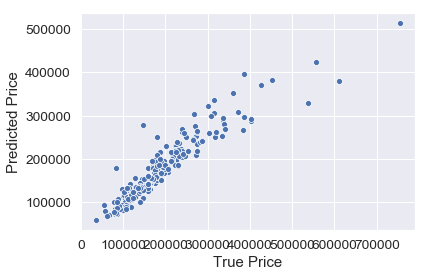

In [73]:
sns.scatterplot(Y_test,predict)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

In [74]:
Test_predict=grid_search.predict(test_feature)
prediction = pd.DataFrame(Test_predict, columns=['SalePrice'])
result = pd.concat([ test['Id'], prediction], axis=1)
result.to_csv('./xgbsubmission.csv', index=False)

 Stacking